
### Imran Sarwar 46588833 Assignment 2
# Deep Learning for Image Classification


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Reading CSVs into dataframes
train_df = pd.read_csv('train.csv')
devtest_df = pd.read_csv('devtest.csv')
test_df = pd.read_csv('test.csv')

### 1.1 Exploration
Displaying one image from each partition set and class, as well as its dimensions.

Training Dataset Images
Paper Image Dimensions (300, 300, 3)
Scissors Image Dimensions (300, 300, 3)
Rock Image Dimensions (300, 300, 3)


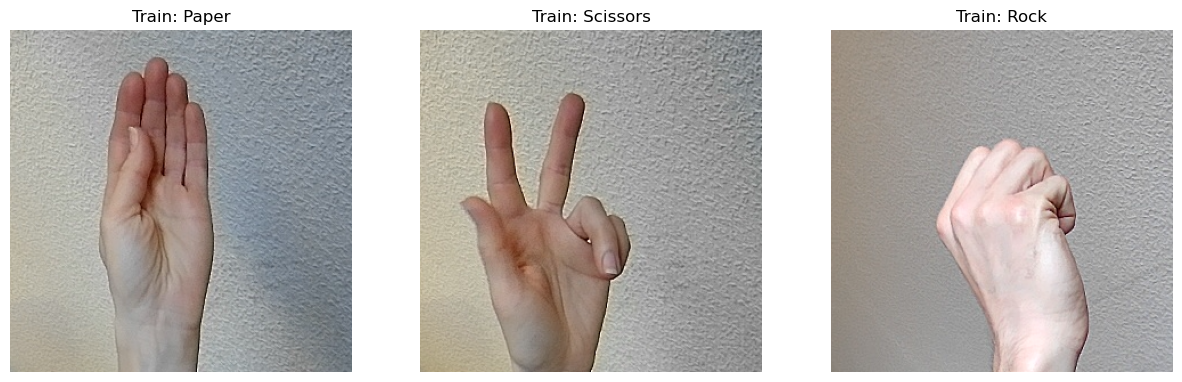

In [3]:
# Retrieving Paper Image
paper_train_df = train_df[train_df['label']=='paper']               # Separating all paper images into its own dataframe
train_paper_path = paper_train_df.iloc[0]['path']                   # Retrieving the path of the first image in the dataframe
train_paper_img = plt.imread(train_paper_path)                      # Reading image path

# Repeat for Rock
rock_train_df = train_df[train_df['label']=='rock']               
train_rock_path = rock_train_df.iloc[0]['path']                   
train_rock_img = plt.imread(train_rock_path)                      

# Repeat for Scissors 
scissors_train_df = train_df[train_df['label']=='scissors']               
train_scissors_path = scissors_train_df.iloc[0]['path']                   
train_scissors_img = plt.imread(train_scissors_path)                                         

#Displaying images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(train_paper_img)
axes[0].set_title('Train: Paper')
axes[0].axis('off')  

axes[1].imshow(train_scissors_img)
axes[1].set_title('Train: Scissors')
axes[1].axis('off')

axes[2].imshow(train_rock_img)
axes[2].set_title('Train: Rock')
axes[2].axis('off')
print("Training Dataset Images")
print("Paper Image Dimensions", train_paper_img.shape)
print("Scissors Image Dimensions", train_scissors_img.shape)
print("Rock Image Dimensions", train_rock_img.shape)

Test Dataset Images
Paper Image Dimensions (300, 300, 3)
Scissors Image Dimensions (300, 300, 3)
Rock Image Dimensions (300, 300, 3)


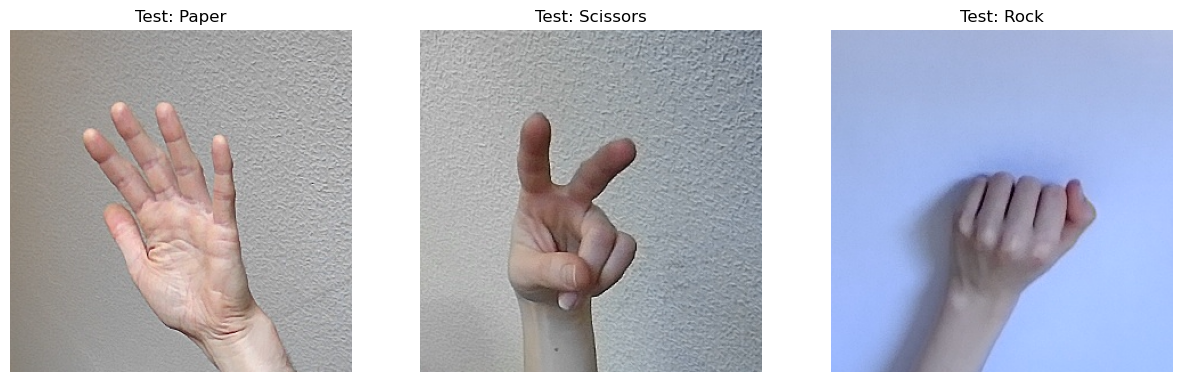

In [4]:
# Retrieving Paper Image
paper_test_df = test_df[test_df['label']=='paper']               # Separating all paper images into its own dataframe
test_paper_path = paper_test_df.iloc[0]['path']                   # Retrieving the path of the first image in the dataframe
test_paper_img = plt.imread(test_paper_path)                      # Reading image path

# Repeat for Rock
rock_test_df = test_df[test_df['label']=='rock']               
test_rock_path = rock_test_df.iloc[0]['path']                   
test_rock_img = plt.imread(test_rock_path)                      

# Repeat for Scissors 
scissors_test_df = test_df[test_df['label']=='scissors']               
test_scissors_path = scissors_test_df.iloc[0]['path']                   
test_scissors_img = plt.imread(test_scissors_path)                                         

#Displaying images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(test_paper_img)
axes[0].set_title('Test: Paper')
axes[0].axis('off')  

axes[1].imshow(test_scissors_img)
axes[1].set_title('Test: Scissors')
axes[1].axis('off')

axes[2].imshow(test_rock_img)
axes[2].set_title('Test: Rock')
axes[2].axis('off')
print("Test Dataset Images")
print("Paper Image Dimensions", test_paper_img.shape)
print("Scissors Image Dimensions", test_scissors_img.shape)
print("Rock Image Dimensions", test_rock_img.shape)

Devtest Dataset Images
Paper Image Dimensions (300, 300, 3)
Scissors Image Dimensions (300, 300, 3)
Rock Image Dimensions (300, 300, 3)


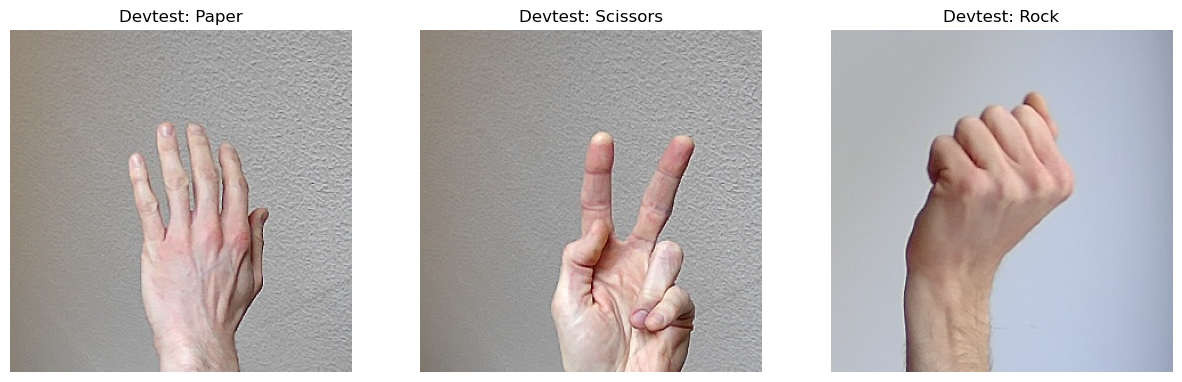

In [5]:
# Retrieving Paper Image
paper_devtest_df = devtest_df[devtest_df['label']=='paper']               # Separating all paper images into its own dataframe
devtest_paper_path = paper_devtest_df.iloc[0]['path']                   # Retrieving the path of the first image in the dataframe
devtest_paper_img = plt.imread(devtest_paper_path)                      # Reading image path

# Repeat for Rock
rock_devtest_df = devtest_df[devtest_df['label']=='rock']               
devtest_rock_path = rock_devtest_df.iloc[0]['path']                   
devtest_rock_img = plt.imread(devtest_rock_path)                      

# Repeat for Scissors 
scissors_devtest_df = devtest_df[devtest_df['label']=='scissors']               
devtest_scissors_path = scissors_devtest_df.iloc[0]['path']                   
devtest_scissors_img = plt.imread(devtest_scissors_path)                                         

#Displaying images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(devtest_paper_img)
axes[0].set_title('Devtest: Paper')
axes[0].axis('off')  

axes[1].imshow(devtest_scissors_img)
axes[1].set_title('Devtest: Scissors')
axes[1].axis('off')

axes[2].imshow(devtest_rock_img)
axes[2].set_title('Devtest: Rock')
axes[2].axis('off')
print("Devtest Dataset Images")
print("Paper Image Dimensions", devtest_paper_img.shape)
print("Scissors Image Dimensions", devtest_scissors_img.shape)
print("Rock Image Dimensions", devtest_rock_img.shape)

Number of Images by Class and Partition

In [7]:
print("Train - Paper Number of Images:", paper_train_df.shape[0])
print("Train - Scissors Number of Images:", scissors_train_df.shape[0])
print("Train - Rock Number of Images:", rock_train_df.shape[0])
print("Test - Paper Number of Images:", paper_test_df.shape[0])
print("Test - Scissors Number of Images:", scissors_test_df.shape[0])
print("Test - Rock Number of Images:", rock_test_df.shape[0])
print("Devtest - Paper Number of Images:", paper_devtest_df.shape[0])
print("Devtest - Scissors Number of Images:", scissors_devtest_df.shape[0])
print("Devtest - Rock Number of Images:", rock_devtest_df.shape[0])

Train - Paper Number of Images: 544
Train - Scissors Number of Images: 541
Train - Rock Number of Images: 544
Test - Paper Number of Images: 182
Test - Scissors Number of Images: 182
Test - Rock Number of Images: 182
Devtest - Paper Number of Images: 181
Devtest - Scissors Number of Images: 180
Devtest - Rock Number of Images: 181


### 1.2 Dataset and Dataloader Preparation

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import cv2

device = "cuda" if torch.cuda.is_available() else "cpu"
print("The device is", device)

# Define Dataset Class
class ImageDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        self.label_map = {'rock': 0, 'paper': 1, 'scissors': 2}     # Map string to int

    def __len__(self):
        return len(self.data)

    def __getitem__(self, ix):
        img = cv2.imread(self.data.iloc[ix, 0])  # BGR
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Now it's RGB
        img = cv2.resize(img, (100, 100))
        img = torch.tensor(img).float().permute(2, 0, 1) / 255  

        label_str = self.data.iloc[ix, 1]
        label = self.label_map[label_str]  # convert to int label

        return torch.tensor(img).to(device).float(), \
           torch.tensor(label).long().to(device)

# Define Dataloaders

train_loader = DataLoader(ImageDataset('train.csv'),batch_size=32,shuffle=True)
test_loader = DataLoader(ImageDataset('test.csv'), batch_size=32, shuffle=False)
devtest_loader = DataLoader(ImageDataset('devtest.csv'), batch_size=32, shuffle=False)

The device is cpu


## Task 2 - Classification
### Task 2.1 Using ConvNets

Defining PyTorch Convolutional Neural Network Model

**Justification of Inputs:**

Layers: 2 convolutional blocks (for feature extraction);
1 fully connected block (the first linear layer + ReLU);
1 output layer (the final linear layer)

Kernel Size: 3×3 convolution kernel - standard/common choice for kernel size in machine learning algorithms.

Padding = 1 - to maintain spatial dimensions and prevent shrinking.

ReLU activation - enables the network to learn non-linear decision boundaries from the detected features.

Pooling size of 2 after each layer for downsampling/reducing each spatial dimension by half.

Flatten() - converts the 3D feature maps (32×25×25) into a 1D vector for the linear layers.

Linear(32x25x25) due to 100x100 image being halved twice (100>50>25). 

Linear(128x3) due to final output being 3 classes. 


In [ ]:
import torch.nn as nn

model = nn.Sequential(
    nn.Conv2d(3,16,kernel_size=3, padding=1),           # First convolutional block
    nn.ReLU(),
    nn.MaxPool2d(2),

    nn.Conv2d(16,32,kernel_size=3, padding=1),          # Second convolutional block
    nn.ReLU(),
    nn.MaxPool2d(2),


    nn.Flatten(),                                       #Flattening from 3D to 1D
    nn.Linear(32*25*25,128),                            # Fully connected block
    nn.ReLU(),
    nn.Linear(128,3)                                    # Output layer
    ).to(device)


Summary of Model

In [ ]:
from torchsummary import summary
summary(model, (3,100,100))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 16, 100, 100]        448
├─ReLU: 1-2                              [-1, 16, 100, 100]        --
├─MaxPool2d: 1-3                         [-1, 16, 50, 50]          --
├─Conv2d: 1-4                            [-1, 32, 50, 50]          4,640
├─ReLU: 1-5                              [-1, 32, 50, 50]          --
├─MaxPool2d: 1-6                         [-1, 32, 25, 25]          --
├─Flatten: 1-7                           [-1, 20000]               --
├─Linear: 1-8                            [-1, 128]                 2,560,128
├─ReLU: 1-9                              [-1, 128]                 --
├─Linear: 1-10                           [-1, 3]                   387
Total params: 2,565,603
Trainable params: 2,565,603
Non-trainable params: 0
Total mult-adds (M): 18.40
Input size (MB): 0.11
Forward/backward pass size (MB): 1.83
Params size (MB): 9.79
Estimated Total Size (MB): 

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 16, 100, 100]        448
├─ReLU: 1-2                              [-1, 16, 100, 100]        --
├─MaxPool2d: 1-3                         [-1, 16, 50, 50]          --
├─Conv2d: 1-4                            [-1, 32, 50, 50]          4,640
├─ReLU: 1-5                              [-1, 32, 50, 50]          --
├─MaxPool2d: 1-6                         [-1, 32, 25, 25]          --
├─Flatten: 1-7                           [-1, 20000]               --
├─Linear: 1-8                            [-1, 128]                 2,560,128
├─ReLU: 1-9                              [-1, 128]                 --
├─Linear: 1-10                           [-1, 3]                   387
Total params: 2,565,603
Trainable params: 2,565,603
Non-trainable params: 0
Total mult-adds (M): 18.40
Input size (MB): 0.11
Forward/backward pass size (MB): 1.83
Params size (MB): 9.79
Estimated Total Size (MB): 

Defining functions required for training.

In [ ]:
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim

# Define model, loss function and optimizer
def get_model():
    model = model
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)   

    return model, loss_fn, optimizer


# Train one batch
def train_batch(x, y, model, optimizer, loss_fn):
    model.train()
    optimizer.zero_grad()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

# Calculate batch accuracy 
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

Training over 10 epochs using the training data, and testing against the validation data to determine when to stop training using the generated plot. 

In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# 1. Initialize the model, loss, optimizer, DataLoaders
model, loss_fn, optimizer = get_model()

# 2. Lists to store accuracy/loss per epoch
train_accuracies = []
devtest_accuracies = []
losses = []
max_devtest_accuracy = 0

# 3. Set max number of epochs 
max_epochs = 20

# 4. Training loop
for epoch in range(max_epochs):
    epoch_accuracies = []
    epoch_losses = []
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{max_epochs}", unit=" batch")

    # 5. Train on all batches
    for batch in tqdm(train_loader):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        batch_accuracy = accuracy(x, y, model)
        epoch_losses.append(batch_loss)
        epoch_accuracies.extend(batch_accuracy)

    # 6. Evaluate on devtest set
    epoch_devtest_accuracies = []
    for batch in devtest_loader:
        x, y = batch
        epoch_devtest_accuracies.extend(accuracy(x, y, model))

    # 7. Store mean values
    epoch_loss = np.mean(epoch_losses)
    epoch_accuracy = np.mean(epoch_accuracies)
    epoch_devtest_accuracy = np.mean(epoch_devtest_accuracies)
    losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    devtest_accuracies.append(epoch_devtest_accuracy)
    print(f"  Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, Validation Accuracy: {epoch_devtest_accuracy:.4f}")

    # 8. Save the model if the validation accuracy is the highest so far
    if epoch_devtest_accuracy > max_devtest_accuracy:
        torch.save(model.state_dict(), "best_model.pth")
        max_test_accuracy = epoch_devtest_accuracy

  0%|          | 0/51 [00:00<?, ?it/s]/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_44158/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \
100%|██████████| 51/51 [00:46<00:00,  1.10it/s]


  Train Loss: 0.9801, Train Accuracy: 0.5629, Validation Accuracy: 0.6771


100%|██████████| 51/51 [00:27<00:00,  1.87it/s]


  Train Loss: 0.6612, Train Accuracy: 0.7440, Validation Accuracy: 0.7638


100%|██████████| 51/51 [00:36<00:00,  1.39it/s]


  Train Loss: 0.4649, Train Accuracy: 0.8441, Validation Accuracy: 0.8118


100%|██████████| 51/51 [00:29<00:00,  1.72it/s]


  Train Loss: 0.3280, Train Accuracy: 0.8932, Validation Accuracy: 0.8542


100%|██████████| 51/51 [00:29<00:00,  1.74it/s]


  Train Loss: 0.2385, Train Accuracy: 0.9282, Validation Accuracy: 0.8911


100%|██████████| 51/51 [00:28<00:00,  1.79it/s]


  Train Loss: 0.1968, Train Accuracy: 0.9441, Validation Accuracy: 0.9207


100%|██████████| 51/51 [00:33<00:00,  1.54it/s]


  Train Loss: 0.1300, Train Accuracy: 0.9656, Validation Accuracy: 0.9207


100%|██████████| 51/51 [00:28<00:00,  1.77it/s]


  Train Loss: 0.0821, Train Accuracy: 0.9865, Validation Accuracy: 0.9428


100%|██████████| 51/51 [00:27<00:00,  1.83it/s]


  Train Loss: 0.0872, Train Accuracy: 0.9847, Validation Accuracy: 0.9428


100%|██████████| 51/51 [00:26<00:00,  1.92it/s]


  Train Loss: 0.0898, Train Accuracy: 0.9834, Validation Accuracy: 0.9465


100%|██████████| 51/51 [00:27<00:00,  1.86it/s]


  Train Loss: 0.0862, Train Accuracy: 0.9816, Validation Accuracy: 0.9557


100%|██████████| 51/51 [04:05<00:00,  4.82s/it]


  Train Loss: 0.0397, Train Accuracy: 0.9975, Validation Accuracy: 0.9557


100%|██████████| 51/51 [00:28<00:00,  1.81it/s]


  Train Loss: 0.0194, Train Accuracy: 0.9994, Validation Accuracy: 0.9594


100%|██████████| 51/51 [00:28<00:00,  1.76it/s]


  Train Loss: 0.0172, Train Accuracy: 1.0000, Validation Accuracy: 0.9631


100%|██████████| 51/51 [00:58<00:00,  1.15s/it]


  Train Loss: 0.0280, Train Accuracy: 0.9982, Validation Accuracy: 0.9613


100%|██████████| 51/51 [00:27<00:00,  1.82it/s]


  Train Loss: 0.0093, Train Accuracy: 1.0000, Validation Accuracy: 0.9576


100%|██████████| 51/51 [00:25<00:00,  2.00it/s]


  Train Loss: 0.0059, Train Accuracy: 1.0000, Validation Accuracy: 0.9631


100%|██████████| 51/51 [00:24<00:00,  2.06it/s]


  Train Loss: 0.0037, Train Accuracy: 1.0000, Validation Accuracy: 0.9576


100%|██████████| 51/51 [00:23<00:00,  2.14it/s]


  Train Loss: 0.0041, Train Accuracy: 1.0000, Validation Accuracy: 0.9557


100%|██████████| 51/51 [00:30<00:00,  1.65it/s]


  Train Loss: 0.0029, Train Accuracy: 1.0000, Validation Accuracy: 0.9613


/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_44158/119763593.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \


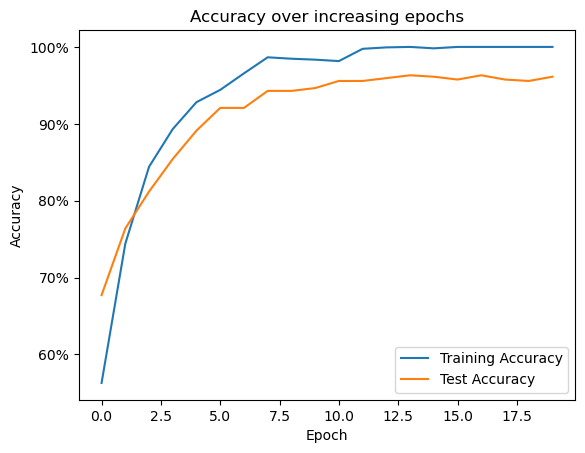

In [ ]:
# display the variation of the training and validation accuracies over increasing epochs
plt.title('Accuracy over increasing epochs')
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(devtest_accuracies, label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
                           for x in plt.gca().get_yticks()])
plt.legend()

Based on this plot, we see devtest accuracy peaks at epoch 13 before becoming unstable. After epoch 13, the training accuracy is equal to 1 and remains at 1 for remaining epochs whilst the validation accuracy fluctuates around the same level, which indicates that the model is memorising the data and overfitting. Therefore we will choose 13 as the optimal number of epochs.

In [13]:
# Load the model with the highest test accuracy
model.load_state_dict(torch.load("best_model.pth"))

# Compute the accuracy of the model on the test set
test_accuracies = []
for batch in test_loader:
  x, y = batch
  batch_accuracy = accuracy(x, y, model)
  test_accuracies.extend(batch_accuracy)
test_accuracy = np.mean(test_accuracies)
print(f"Test Accuracy: {test_accuracy:.4f}")

/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_44158/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \


Test Accuracy: 0.9689


## Task 2.2 Using Pre-Trained Models


In [24]:
from torchvision import models

# Load pre-trained MobileNet model
mobilenet = models.mobilenet_v2(pretrained=True)

# Freeze all parameters in the base model
for param in mobilenet.parameters():
    param.requires_grad = False

# Get the number of features from the last layer
num_features = mobilenet.classifier[1].in_features

# Replace the classifier with a new one for our 3 classes
mobilenet.classifier = nn.Sequential(
    nn.Dropout(0.2),  # Keep the dropout for regularization
    nn.Linear(num_features, 3)  # Assuming 3 classes as in your original model
)

# 1. Define model, loss function and optimizer
pre_model = mobilenet.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(pre_model.classifier.parameters(), lr=0.001)

# 2. Lists to store accuracy/loss per epoch
train_accuracies = []
devtest_accuracies = []
losses = []
max_devtest_accuracy = 0

# 3. Set max number of epochs 
max_epochs = 20

# 4. Training loop
for epoch in range(max_epochs):
    epoch_accuracies = []
    epoch_losses = []
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{max_epochs}", unit=" batch")

    # 5. Train on all batches
    for batch in tqdm(train_loader):
        x, y = batch
        batch_loss = train_batch(x, y, pre_model, optimizer, loss_fn)
        batch_accuracy = accuracy(x, y, pre_model)
        epoch_losses.append(batch_loss)
        epoch_accuracies.extend(batch_accuracy)

    # 6. Evaluate on devtest set
    epoch_devtest_accuracies = []
    for batch in devtest_loader:
        x, y = batch
        epoch_devtest_accuracies.extend(accuracy(x, y, pre_model))

    # 7. Store mean values
    epoch_loss = np.mean(epoch_losses)
    epoch_accuracy = np.mean(epoch_accuracies)
    epoch_devtest_accuracy = np.mean(epoch_devtest_accuracies)
    losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    devtest_accuracies.append(epoch_devtest_accuracy)
    print(f"  Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, Validation Accuracy: {epoch_devtest_accuracy:.4f}")

    # 8. Save the model if the validation accuracy is the highest so far
    if epoch_devtest_accuracy > max_devtest_accuracy:
        torch.save(pre_model.state_dict(), "best_pre_model.pth")
        max_test_accuracy = epoch_devtest_accuracy

Epoch 1/20:   0%|          | 0/51 [00:06<?, ? batch/s]
/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_44158/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \
100%|██████████| 51/51 [01:07<00:00,  1.33s/it]


  Train Loss: 0.6186, Train Accuracy: 0.7324, Validation Accuracy: 0.9077


100%|██████████| 51/51 [01:18<00:00,  1.53s/it]


  Train Loss: 0.3021, Train Accuracy: 0.9343, Validation Accuracy: 0.9410


100%|██████████| 51/51 [06:26<00:00,  7.58s/it]


  Train Loss: 0.2535, Train Accuracy: 0.9527, Validation Accuracy: 0.9483


100%|██████████| 51/51 [01:01<00:00,  1.21s/it]


  Train Loss: 0.2262, Train Accuracy: 0.9595, Validation Accuracy: 0.9483


100%|██████████| 51/51 [01:06<00:00,  1.31s/it]


  Train Loss: 0.1855, Train Accuracy: 0.9626, Validation Accuracy: 0.9410


100%|██████████| 51/51 [01:13<00:00,  1.44s/it]


  Train Loss: 0.1789, Train Accuracy: 0.9724, Validation Accuracy: 0.9594


100%|██████████| 51/51 [01:17<00:00,  1.51s/it]


  Train Loss: 0.1749, Train Accuracy: 0.9736, Validation Accuracy: 0.9520


100%|██████████| 51/51 [01:15<00:00,  1.48s/it]


  Train Loss: 0.1674, Train Accuracy: 0.9754, Validation Accuracy: 0.9483


100%|██████████| 51/51 [01:13<00:00,  1.44s/it]


  Train Loss: 0.1550, Train Accuracy: 0.9767, Validation Accuracy: 0.9649


100%|██████████| 51/51 [01:13<00:00,  1.44s/it]


  Train Loss: 0.1585, Train Accuracy: 0.9761, Validation Accuracy: 0.9557


100%|██████████| 51/51 [01:13<00:00,  1.45s/it]


  Train Loss: 0.1386, Train Accuracy: 0.9785, Validation Accuracy: 0.9631


100%|██████████| 51/51 [01:12<00:00,  1.42s/it]


  Train Loss: 0.1373, Train Accuracy: 0.9797, Validation Accuracy: 0.9594


100%|██████████| 51/51 [01:14<00:00,  1.46s/it]


  Train Loss: 0.1295, Train Accuracy: 0.9840, Validation Accuracy: 0.9668


100%|██████████| 51/51 [01:09<00:00,  1.37s/it]


  Train Loss: 0.1188, Train Accuracy: 0.9865, Validation Accuracy: 0.9649


100%|██████████| 51/51 [01:11<00:00,  1.41s/it]


  Train Loss: 0.1264, Train Accuracy: 0.9865, Validation Accuracy: 0.9539


100%|██████████| 51/51 [01:17<00:00,  1.51s/it]


  Train Loss: 0.1062, Train Accuracy: 0.9865, Validation Accuracy: 0.9668


100%|██████████| 51/51 [01:09<00:00,  1.37s/it]


  Train Loss: 0.1149, Train Accuracy: 0.9896, Validation Accuracy: 0.9686


100%|██████████| 51/51 [01:09<00:00,  1.36s/it]


  Train Loss: 0.0951, Train Accuracy: 0.9847, Validation Accuracy: 0.9649


100%|██████████| 51/51 [01:12<00:00,  1.41s/it]


  Train Loss: 0.1031, Train Accuracy: 0.9877, Validation Accuracy: 0.9613


100%|██████████| 51/51 [01:11<00:00,  1.40s/it]


  Train Loss: 0.1028, Train Accuracy: 0.9908, Validation Accuracy: 0.9594


/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_44158/2189797719.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \


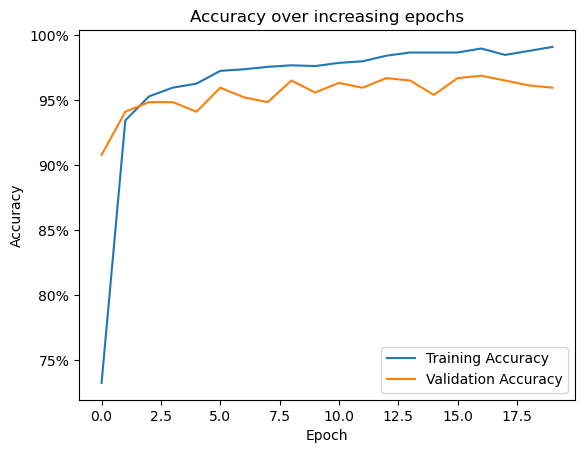

In [25]:
# display the variation of the training and validation accuracies over increasing epochs
plt.title('Accuracy over increasing epochs')
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(devtest_accuracies, label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
                           for x in plt.gca().get_yticks()])
plt.legend()

The plot shows the validation accuracy peaks at around epoch 16 before becoming unstable and plateauing, whilst the training accuracy continues to increase slightly. There is a slightly growing gap between the training accuracy and validation accuracy as number of epochs increases, which indicates slightly overfitting.


In [26]:
# Load the model with the highest test accuracy
pre_model.load_state_dict(torch.load("best_pre_model.pth"))

# Compute the accuracy of the model on the test set
test_accuracies = []
for batch in test_loader:
  x, y = batch
  batch_accuracy = accuracy(x, y, pre_model)
  test_accuracies.extend(batch_accuracy)
test_accuracy = np.mean(test_accuracies)
print(f"Test Accuracy: {test_accuracy:.4f}")

/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_44158/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \


Test Accuracy: 0.9835


### Model Comparison
**Overfitting Comparison**

Model 1 (Custom CNN):

Shows more significant overfitting with a larger gap between training accuracy (reaching nearly 100%) and test accuracy (peaking around 96-97%)
The training accuracy quickly reaches near-perfect levels while test accuracy lags behind by approximately 5-7 percentage points

Model 2 (Pre-trained MobileNet):

Exhibits milder overfitting with a smaller gap (about 3-4 percentage points) between training and validation accuracy
Both curves follow a more similar trajectory, suggesting better generalization

**Learning Capabilities**

Model 1:

Learns very quickly, reaching high training accuracy within the first 5-7 epochs.
Shows strong memorization of the training data but less ability to generalize and lower test accuracy.
Final test accuracy is 0.9689.

Model 2:

Shows more gradual, steady improvement in both training and validation sets
Better generalization ability with validation performance closer to training performance as well as higher test accuracy.
Final test accuracy is 0.9835.

**Best Learning System**

Model 2 learned better overall, despite potentially having slightly lower peak accuracy. It demonstrates better generalization with less overfitting, which is typically more valuable in real-world applications than pure training accuracy.

**Tradeoffs**

Training Speed vs. Accuracy:

Model 1 (custom CNN) likely trained faster due to its simpler architecture, but shows more overfitting
Model 2 (MobileNet) probably required more computational resources and time due to its larger architecture, but provided better generalization


Model Complexity vs. Performance:

Model 2 leverages transfer learning from a more sophisticated architecture, bringing knowledge from previous training.
Model 1 is built from scratch and has to learn all features without prior knowledge.

/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_44158/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \


<Figure size 800x600 with 0 Axes>

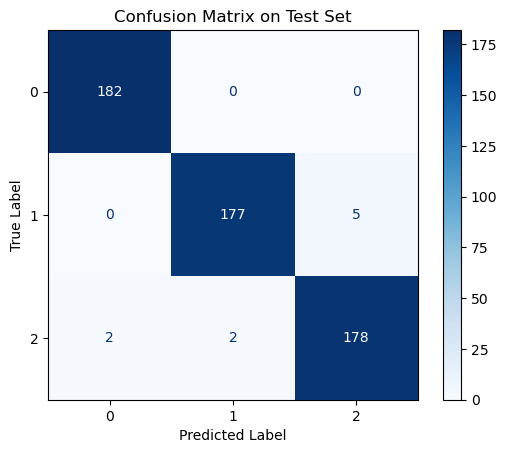

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Load the model with the best weights
pre_model.load_state_dict(torch.load("best_pre_model.pth"))
pre_model.eval()  # Set to eval mode for inference

# 2. Collect predictions and true labels
all_preds = []
all_labels = []

with torch.no_grad():  # No need to track gradients during evaluation
    for batch in test_loader:
        x, y = batch
        outputs = pre_model(x)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y.cpu().numpy())

# 3. Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# 4. Display the matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_44158/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \


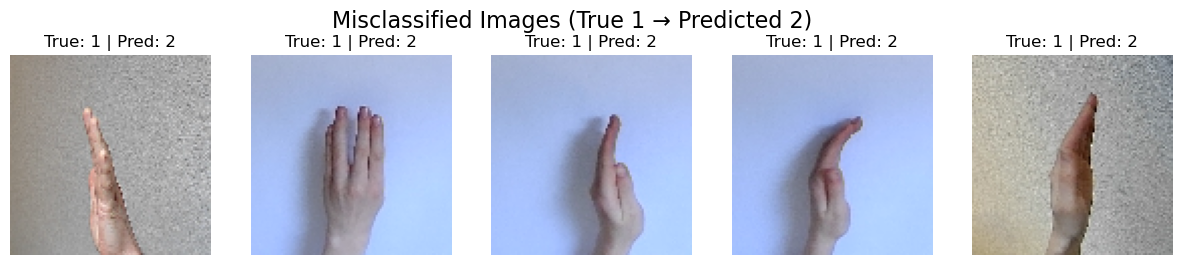

In [28]:
# 1. Make sure your model is in evaluation mode
pre_model.eval()

# 2. Store misclassified images
misclassified_imgs = []
max_images = 5

with torch.no_grad():
    for batch in test_loader:
        x, y = batch
        outputs = pre_model(x)
        preds = torch.argmax(outputs, dim=1)

        # 3. Find where true label is 1 and predicted is 2
        mask = (y == 1) & (preds == 2)
        indices = torch.where(mask)[0]

        # 4. Collect up to 5 images
        for idx in indices:
            if len(misclassified_imgs) >= max_images:
                break
            misclassified_imgs.append(x[idx])

        if len(misclassified_imgs) >= max_images:
            break

# 5. Plot the misclassified images
plt.figure(figsize=(15, 3))
for i, img in enumerate(misclassified_imgs):
    plt.subplot(1, len(misclassified_imgs), i + 1)
    if img.shape[0] == 1:  # grayscale image
        plt.imshow(img.squeeze(), cmap='gray')
    else:
        plt.imshow(img.permute(1, 2, 0))  # RGB image
    plt.title("True: 1 | Pred: 2")
    plt.axis('off')

plt.suptitle("Misclassified Images (True 1 → Predicted 2)", fontsize=16)
plt.show()


## Task 3 - Deployment to Webcam


In [50]:
import os
import time

def capture_images(cap, label, time_lapse):
    if not os.path.exists(label):
        os.makedirs(label)
    start=time.time()
    while True:
        ret, frame = cap.read()
        frame = frame[100:600, 200:600]


        if ret:
            cv2.imshow('frame', frame)
            if time.time() - start > time_lapse:
                cv2.imwrite(f"{label}/{time.time()}.png", frame)
                start = time.time()
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break;
        else: 
            break;
    cv2.destroyAllWindows()


In [59]:
cap = cv2.VideoCapture(0)
capture_images(cap,"webcam_scissors",1)
cap.release()

KeyboardInterrupt: 

In [ ]:
cap = cv2.VideoCapture(0)
capture_images(cap,"webcam_rock",0.5)
cap.release()

KeyboardInterrupt: 

In [63]:
cap = cv2.VideoCapture(0)
capture_images(cap,"webcam_paper",0.5)
cap.release()

KeyboardInterrupt: 

In [74]:
dataset_path = "/Users/imransarwar/Documents/GitHub/assignment-2-imransarwar23"

df_scissors = [(os.path.join('webcam_scissors', f), 'scissors') for f in os.listdir(os.path.join(dataset_path, 'webcam_scissors'))]
df_paper = [(os.path.join('webcam_paper', f), 'paper') for f in os.listdir(os.path.join(dataset_path, 'webcam_paper'))]
df_rock = [(os.path.join('webcam_rock', f), 'rock') for f in os.listdir(os.path.join(dataset_path, 'webcam_rock'))]

print("Scissors Length:", len(df_scissors))
print("Paper Length:", len(df_paper))
print("Rock Length:", len(df_rock))


Scissors Length: 100
Paper Length: 100
Rock Length: 100


In [81]:
import random

random.shuffle(df_scissors)
random.shuffle(df_paper)
random.shuffle(df_rock)

# Partition each class into train/devtest/test
train_files = df_scissors[:50] + df_paper[:50] + df_rock[:50]
devtest_files = df_scissors[50:75] + df_paper[50:75] + df_rock[50:75]
test_files = df_scissors[75:] + df_paper[75:] + df_rock[75:]

# Shuffle the partitions
random.shuffle(train_files)
random.shuffle(devtest_files)
random.shuffle(test_files)

# Save to CSV with headers `path,label`
new_train_df = pd.DataFrame(train_files, columns=['path', 'label'])
new_devtest_df = pd.DataFrame(devtest_files, columns=['path', 'label'])
new_test_df = pd.DataFrame(test_files, columns=['path', 'label'])

train_df.to_csv("webcam_train.csv", index=False)
devtest_df.to_csv("webcam_devtest.csv", index=False)
test_df.to_csv("webcam_test.csv", index=False)

In [82]:
new_train_df

path     label
0      webcam_paper/1744196876.0162072.png     paper
1       webcam_paper/1744196887.377116.png     paper
2        webcam_rock/1744196765.346829.png      rock
3    webcam_scissors/1744196647.663147.png  scissors
4       webcam_paper/1744196879.809012.png     paper
..                                     ...       ...
145  webcam_scissors/1744196644.565577.png  scissors
146      webcam_rock/1744196755.477605.png      rock
147      webcam_rock/1744196769.063777.png      rock
148     webcam_paper/1744196883.591392.png     paper
149    webcam_paper/1744196987.9313412.png     paper

[150 rows x 2 columns]

Training Dataset Images
Paper Image Dimensions (500, 400, 3)
Scissors Image Dimensions (500, 400, 3)
Rock Image Dimensions (500, 400, 3)


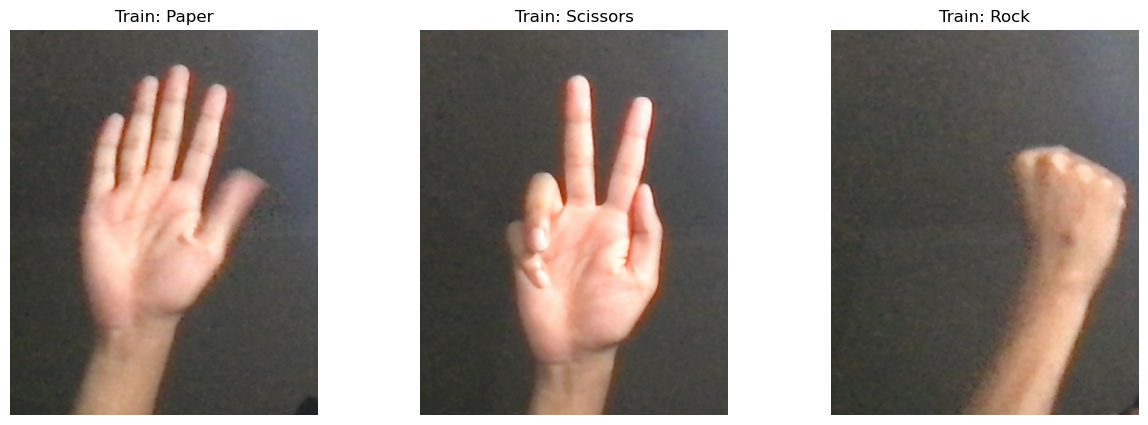

In [83]:
# Retrieving Paper Image
paper_train_df = new_train_df[new_train_df['label']=='paper']               # Separating all paper images into its own dataframe
train_paper_path = paper_train_df.iloc[0]['path']                   # Retrieving the path of the first image in the dataframe
train_paper_img = plt.imread(train_paper_path)                      # Reading image path

# Repeat for Rock
rock_train_df = new_train_df[new_train_df['label']=='rock']               
train_rock_path = rock_train_df.iloc[0]['path']                   
train_rock_img = plt.imread(train_rock_path)                      

# Repeat for Scissors 
scissors_train_df = new_train_df[new_train_df['label']=='scissors']               
train_scissors_path = scissors_train_df.iloc[0]['path']                   
train_scissors_img = plt.imread(train_scissors_path)                                         

#Displaying images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(train_paper_img)
axes[0].set_title('Train: Paper')
axes[0].axis('off')  

axes[1].imshow(train_scissors_img)
axes[1].set_title('Train: Scissors')
axes[1].axis('off')

axes[2].imshow(train_rock_img)
axes[2].set_title('Train: Rock')
axes[2].axis('off')
print("Training Dataset Images")
print("Paper Image Dimensions", train_paper_img.shape)
print("Scissors Image Dimensions", train_scissors_img.shape)
print("Rock Image Dimensions", train_rock_img.shape)

Test Dataset Images
Paper Image Dimensions (500, 400, 3)
Scissors Image Dimensions (500, 400, 3)
Rock Image Dimensions (500, 400, 3)


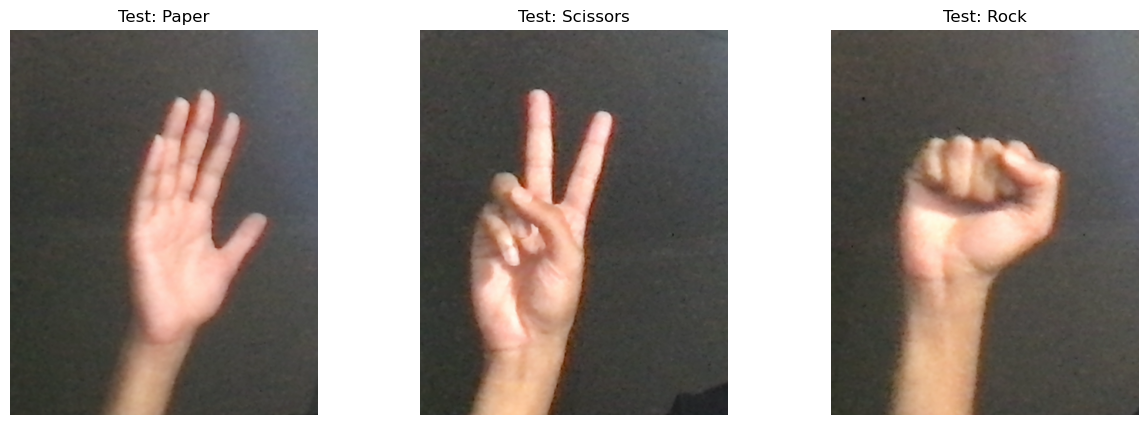

In [84]:
# Retrieving Paper Image
paper_test_df = new_test_df[new_test_df['label']=='paper']               # Separating all paper images into its own dataframe
test_paper_path = paper_test_df.iloc[0]['path']                   # Retrieving the path of the first image in the dataframe
test_paper_img = plt.imread(test_paper_path)                      # Reading image path

# Repeat for Rock
rock_test_df = new_test_df[new_test_df['label']=='rock']               
test_rock_path = rock_test_df.iloc[0]['path']                   
test_rock_img = plt.imread(test_rock_path)                      

# Repeat for Scissors 
scissors_test_df = new_test_df[new_test_df['label']=='scissors']               
test_scissors_path = scissors_test_df.iloc[0]['path']                   
test_scissors_img = plt.imread(test_scissors_path)                                         

#Displaying images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(test_paper_img)
axes[0].set_title('Test: Paper')
axes[0].axis('off')  

axes[1].imshow(test_scissors_img)
axes[1].set_title('Test: Scissors')
axes[1].axis('off')

axes[2].imshow(test_rock_img)
axes[2].set_title('Test: Rock')
axes[2].axis('off')
print("Test Dataset Images")
print("Paper Image Dimensions", test_paper_img.shape)
print("Scissors Image Dimensions", test_scissors_img.shape)
print("Rock Image Dimensions", test_rock_img.shape)

Devtest Dataset Images
Paper Image Dimensions (500, 400, 3)
Scissors Image Dimensions (500, 400, 3)
Rock Image Dimensions (500, 400, 3)


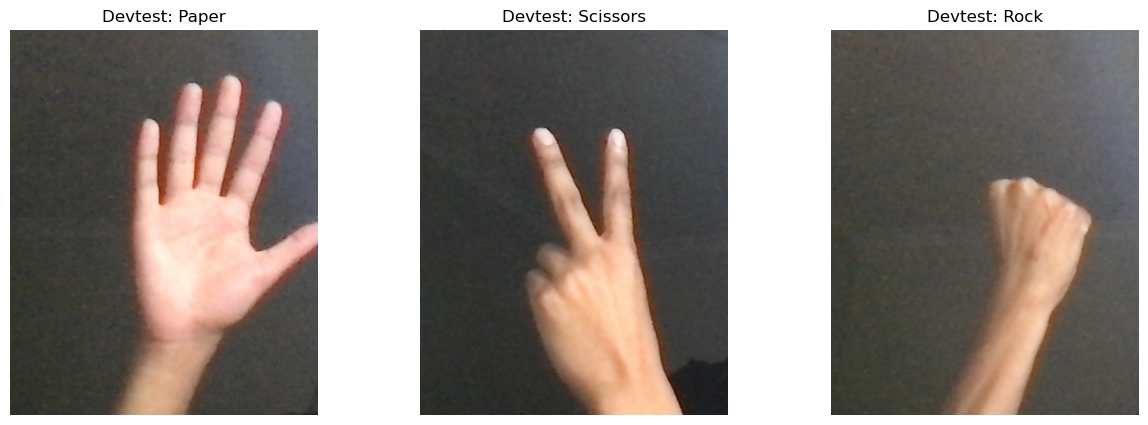

In [85]:
# Retrieving Paper Image
paper_devtest_df = new_devtest_df[new_devtest_df['label']=='paper']               # Separating all paper images into its own dataframe
devtest_paper_path = paper_devtest_df.iloc[0]['path']                   # Retrieving the path of the first image in the dataframe
devtest_paper_img = plt.imread(devtest_paper_path)                      # Reading image path

# Repeat for Rock
rock_devtest_df = new_devtest_df[new_devtest_df['label']=='rock']               
devtest_rock_path = rock_devtest_df.iloc[0]['path']                   
devtest_rock_img = plt.imread(devtest_rock_path)                      

# Repeat for Scissors 
scissors_devtest_df = new_devtest_df[new_devtest_df['label']=='scissors']               
devtest_scissors_path = scissors_devtest_df.iloc[0]['path']                   
devtest_scissors_img = plt.imread(devtest_scissors_path)                                         

#Displaying images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(devtest_paper_img)
axes[0].set_title('Devtest: Paper')
axes[0].axis('off')  

axes[1].imshow(devtest_scissors_img)
axes[1].set_title('Devtest: Scissors')
axes[1].axis('off')

axes[2].imshow(devtest_rock_img)
axes[2].set_title('Devtest: Rock')
axes[2].axis('off')
print("Devtest Dataset Images")
print("Paper Image Dimensions", devtest_paper_img.shape)
print("Scissors Image Dimensions", devtest_scissors_img.shape)
print("Rock Image Dimensions", devtest_rock_img.shape)

### 3.2 Fine-tuning and Testing

In [94]:
# New dataloaders for partition sets
new_train_loader = DataLoader(ImageDataset("webcam_train.csv"), batch_size=32, shuffle=True)
new_devtest_loader = DataLoader(ImageDataset("webcam_devtest.csv"), batch_size=32, shuffle=False)
new_test_loader = DataLoader(ImageDataset("webcam_test.csv"), batch_size=32, shuffle=False)

# Load the model with the highest test accuracy
pre_model.load_state_dict(torch.load("best_pre_model.pth"))

# Compute the accuracy of the model on the test set
test_accuracies = []
for batch in new_test_loader:
  x, y = batch
  batch_accuracy = accuracy(x, y, pre_model)
  test_accuracies.extend(batch_accuracy)
test_accuracy = np.mean(test_accuracies)
print(f"Test Accuracy: {test_accuracy:.4f}")

/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_44158/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \


Test Accuracy: 0.9835


In [95]:

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4) 
best_dev_accuracy = 0

for epoch in range(10):  # Adjust as needed
    print(f"Epoch {epoch+1}")
    model.train()

    epoch_losses = []
    epoch_accuracies = []

    for x, y in tqdm(new_train_loader):
        optimizer.zero_grad()
        preds = model(x)
        loss = loss_fn(preds, y)
        loss.backward()
        optimizer.step()

        epoch_losses.append(loss.item())
        epoch_accuracies.append((preds.argmax(1) == y).float().mean().item())

    # Evaluate on devtest
    model.eval()
    dev_accuracies = []
    with torch.no_grad():
        for x, y in new_devtest_loader:
            preds = model(x)
            acc = (preds.argmax(1) == y).float().mean().item()
            dev_accuracies.append(acc)

    mean_train_acc = np.mean(epoch_accuracies)
    mean_dev_acc = np.mean(dev_accuracies)

    print(f"Train Acc: {mean_train_acc:.4f}, Dev Acc: {mean_dev_acc:.4f}")

    if mean_dev_acc > best_dev_accuracy:
        best_dev_accuracy = mean_dev_acc
        torch.save(model.state_dict(), "best_finetuned_model.pth")

Epoch 1


  0%|          | 0/51 [00:00<?, ?it/s]/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_44158/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \
100%|██████████| 51/51 [01:02<00:00,  1.23s/it]


Train Acc: 0.9061, Dev Acc: 0.9411
Epoch 2


100%|██████████| 51/51 [00:45<00:00,  1.11it/s]


Train Acc: 0.9042, Dev Acc: 0.9429
Epoch 3


100%|██████████| 51/51 [01:13<00:00,  1.45s/it]


Train Acc: 0.9067, Dev Acc: 0.9484
Epoch 4


100%|██████████| 51/51 [00:39<00:00,  1.30it/s]


Train Acc: 0.9239, Dev Acc: 0.9429
Epoch 5


100%|██████████| 51/51 [00:42<00:00,  1.19it/s]


Train Acc: 0.9214, Dev Acc: 0.9521
Epoch 6


100%|██████████| 51/51 [00:39<00:00,  1.31it/s]


Train Acc: 0.9163, Dev Acc: 0.9539
Epoch 7


100%|██████████| 51/51 [00:36<00:00,  1.38it/s]


Train Acc: 0.9221, Dev Acc: 0.9558
Epoch 8


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Train Acc: 0.9317, Dev Acc: 0.9539
Epoch 9


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Train Acc: 0.9306, Dev Acc: 0.9484
Epoch 10


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Train Acc: 0.9257, Dev Acc: 0.9576


In [ ]:
model.load_state_dict(torch.load("best_finetuned_model.pth"))
model.eval()

test_accuracies = []
with torch.no_grad():
    for x, y in new_test_loader:
        preds = model(x)
        acc = (preds.argmax(1) == y).float().mean().item()
        test_accuracies.append(acc)

final_test_acc = np.mean(test_accuracies)
print(f"Final Test Accuracy on Webcam Images: {final_test_acc:.4f}")

/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_44158/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \


📊 Final Test Accuracy on Webcam Images: 0.9635


In [97]:
model.load_state_dict(torch.load("best_finetuned_model.pth"))
model.eval()

test_accuracies = []
with torch.no_grad():
    for x, y in test_loader:
        preds = model(x)
        acc = (preds.argmax(1) == y).float().mean().item()
        test_accuracies.append(acc)

final_test_acc = np.mean(test_accuracies)
print(f"Final Test Accuracy on Original Test Images: {final_test_acc:.4f}")

/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_44158/654489616.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \


Final Test Accuracy on Original Test Images: 0.9635
